## TASK 4 - Face Mask Detection using Convolutional Neural Networks

Group Number: 4


In [4]:
%load_ext autoreload
%autoreload 1
%aimport my_model, utils, my_datamodule, my_model, my_trainer
%matplotlib inline
import os

import numpy as np
import torch
from torchinfo import summary

import my_datamodule
import my_model
import my_trainer
import utils

torch.manual_seed(30)
np.random.seed(30)

if not os.path.exists(os.path.join(os.getcwd(), 'results')):
    os.makedirs(os.path.join(os.getcwd(), 'results'))

# Check GPU connection
gpu_active = torch.cuda.is_available()
print("GPU is used" if gpu_active else "CPU is used")


CPU is used


### 1. Data import and Preparation

In TASK3 we used a common computer vision processing step for classification problems in computer vision - manual feature extraction. This time we want to use a learning approach which does not need handcrafted inputs. 

Implement the **get_transforms** method. Make sure it returns a transformation that maps input images to tensor values and resizes them to a square image.

For simplicity and actuality you will detect if a person wears a face mask or not. Follow the instructions in the assignment description. Implement the get_transform method of **my_datamodule.DataModule** and create an instance of **DataModule**. Use an image size of 64 and a batch_size around **64**. Depending on your processor you can increase the amount of threads that load data with the parameter **num_worker**. For example use **num_workers=4** to start four worker threads for data loading and preprocessing. 

In [20]:
dataModule = my_datamodule.DataModule(batch_size=64, num_workers=4)

### 2. Simple Face Mask Detection CNN
#### 2.1 Network Structure

This section will familiarize you with the steps of creating a deep artificial neural network from scratch. Implement the **__init__** and **forward** methods of **my_model.MaskClassifier** according to the instructions.

Create a simple classification model using ***model=my_model.MaskClassifier(..)***. Set the image size to **64** (the dataset will be proccessed to squared images) and drop out value to **0**.

Take a look at the structure of your model by calling ***summary(model, (32, 3, img_size, img_size))***

In [21]:
model = my_model.MaskClassifier('MaskClassifier', img_size=64)
summary(model, (32, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
MaskClassifier                           [32, 1]                   --
├─Sequential: 1-1                        [32, 1]                   --
│    └─Conv2d: 2-1                       [32, 32, 62, 62]          896
│    └─MaxPool2d: 2-2                    [32, 32, 31, 31]          --
│    └─ReLU: 2-3                         [32, 32, 31, 31]          --
│    └─Conv2d: 2-4                       [32, 32, 29, 29]          9,248
│    └─MaxPool2d: 2-5                    [32, 32, 14, 14]          --
│    └─ReLU: 2-6                         [32, 32, 14, 14]          --
│    └─Flatten: 2-7                      [32, 6272]                --
│    └─Linear: 2-8                       [32, 1]                   6,273
│    └─Sigmoid: 2-9                      [32, 1]                   --
Total params: 16,417
Trainable params: 16,417
Non-trainable params: 0
Total mult-adds (M): 359.30
Input size (MB): 1.57
Forward/backward pass size (

***
#### Q1: Take a look at the structure of the MaskClassifier CNN. What does the column 'Output Shape' represent? What does the column Param represent? Why is the shape decreasing? Finally, explain why the last layer has length 1. 

Output shape is the size / dimension of the layer at each level of the network. The shape is decreasing because we are applying convolutions and max pooling and a linear layer with less output features than input features. The convolution layers have a kernel size of 3 and no padding, which is why the layer sizes decrease by two for the width and height. Similarly for the max pooling layer, each "pixel" of the output consumes four pixels of the input, taking their maximum value. After flattening, all 6272 features of a given picture in the batch is reduced to 1 feature by the linear layer to produce an output. The Param colum represents the number of trainable parameters at each layer. For the convolutional layers this is equal to
$$
C_{in} * C_{out} * K^2 + C_{out}
$$
where $C_{in}$ is the number of input channels, $C_{out}$ the number of output channels and $K^2$ is the size of the kernel. For every input channel and output channel combination we have a separate kernel and for each output channel an additional bias term. For the linear layer we have 6273 weights for each input node and a bias term.

#### 2.2 Training 

In this step you will train the model with the training and validation data set iterator. The **my_trainer** module provides functionality for training and logging the learning progress.

First create a trainer instance using my_trainer.Trainer(...) and pass the previosuly created model and datamodule to it. If you have a device that supports cuda you can pass **gpu=True** to speed up training. Use trainer.fit(...) to start the training process. Depending on wether you use a GPU or CPU and the number of epochs, the training can take a while. Start with a learning rate of **0.0001** and **50** epochs. The loss should decrease and the accuracy on the validation should increase. The weights of the best model are saved in separate files in your results directory automatically.

In [22]:
trainer = my_trainer.Trainer(model, dataModule, gpu = torch.cuda.is_available())
trainer.fit(epochs=50)

Epoch 0: 100%|██████████| 42/42 [00:18<00:00,  2.24it/s]


Epoch 0 Training: Loss: 0.6784613728523254 Accuracy: 0.6199061274528503
Epoch 0 Validation: Loss: 0.6488490700721741 Accuracy: 0.7967013716697693


Epoch 1: 100%|██████████| 42/42 [00:19<00:00,  2.14it/s]


Epoch 1 Training: Loss: 0.5879997611045837 Accuracy: 0.8444940447807312
Epoch 1 Validation: Loss: 0.5098072290420532 Accuracy: 0.8537326455116272


Epoch 2: 100%|██████████| 42/42 [00:18<00:00,  2.30it/s]


Epoch 2 Training: Loss: 0.43981802463531494 Accuracy: 0.8703067302703857
Epoch 2 Validation: Loss: 0.3851901590824127 Accuracy: 0.8519964814186096


Epoch 3: 100%|██████████| 42/42 [00:18<00:00,  2.25it/s]


Epoch 3 Training: Loss: 0.3462432026863098 Accuracy: 0.8880780339241028
Epoch 3 Validation: Loss: 0.3139195144176483 Accuracy: 0.891406238079071


Epoch 4: 100%|██████████| 42/42 [00:16<00:00,  2.49it/s]


Epoch 4 Training: Loss: 0.29807084798812866 Accuracy: 0.897722065448761
Epoch 4 Validation: Loss: 0.2796083986759186 Accuracy: 0.9020833373069763


Epoch 5: 100%|██████████| 42/42 [00:17<00:00,  2.44it/s]


Epoch 5 Training: Loss: 0.27477478981018066 Accuracy: 0.9037602543830872
Epoch 5 Validation: Loss: 0.2494119554758072 Accuracy: 0.9189236164093018


Epoch 6: 100%|██████████| 42/42 [00:16<00:00,  2.49it/s]


Epoch 6 Training: Loss: 0.2587091326713562 Accuracy: 0.9104853272438049
Epoch 6 Validation: Loss: 0.233887180685997 Accuracy: 0.9189236164093018


Epoch 7: 100%|██████████| 42/42 [00:17<00:00,  2.36it/s]


Epoch 7 Training: Loss: 0.2469375729560852 Accuracy: 0.9107428789138794
Epoch 7 Validation: Loss: 0.2226972132921219 Accuracy: 0.9306423664093018


Epoch 8: 100%|██████████| 42/42 [00:17<00:00,  2.40it/s]


Epoch 8 Training: Loss: 0.2370845526456833 Accuracy: 0.9166952967643738
Epoch 8 Validation: Loss: 0.22723008692264557 Accuracy: 0.9216145873069763


Epoch 9: 100%|██████████| 42/42 [00:17<00:00,  2.38it/s]


Epoch 9 Training: Loss: 0.2323482781648636 Accuracy: 0.9171817302703857
Epoch 9 Validation: Loss: 0.24309547245502472 Accuracy: 0.9085937142372131


Epoch 10: 100%|██████████| 42/42 [00:17<00:00,  2.40it/s]


Epoch 10 Training: Loss: 0.23083937168121338 Accuracy: 0.9226476550102234
Epoch 10 Validation: Loss: 0.2058262974023819 Accuracy: 0.9345486164093018


Epoch 11: 100%|██████████| 42/42 [00:17<00:00,  2.38it/s]


Epoch 11 Training: Loss: 0.22193025052547455 Accuracy: 0.9225332140922546
Epoch 11 Validation: Loss: 0.1977396458387375 Accuracy: 0.9371528029441833


Epoch 12: 100%|██████████| 42/42 [00:18<00:00,  2.32it/s]


Epoch 12 Training: Loss: 0.2176695615053177 Accuracy: 0.925251841545105
Epoch 12 Validation: Loss: 0.19657473266124725 Accuracy: 0.9371528029441833


Epoch 13: 100%|██████████| 42/42 [00:17<00:00,  2.42it/s]


Epoch 13 Training: Loss: 0.21390177309513092 Accuracy: 0.9260817170143127
Epoch 13 Validation: Loss: 0.18958723545074463 Accuracy: 0.9371528029441833


Epoch 14: 100%|██████████| 42/42 [00:17<00:00,  2.43it/s]


Epoch 14 Training: Loss: 0.21605618298053741 Accuracy: 0.9245077967643738
Epoch 14 Validation: Loss: 0.1953614354133606 Accuracy: 0.9399304986000061


Epoch 15: 100%|██████████| 42/42 [00:17<00:00,  2.42it/s]


Epoch 15 Training: Loss: 0.20842425525188446 Accuracy: 0.9253376722335815
Epoch 15 Validation: Loss: 0.19093382358551025 Accuracy: 0.9386284351348877


Epoch 16: 100%|██████████| 42/42 [00:17<00:00,  2.37it/s]


Epoch 16 Training: Loss: 0.20265935361385345 Accuracy: 0.928113579750061
Epoch 16 Validation: Loss: 0.17967073619365692 Accuracy: 0.9345486164093018


Epoch 17: 100%|██████████| 42/42 [00:17<00:00,  2.36it/s]


Epoch 17 Training: Loss: 0.19872522354125977 Accuracy: 0.9278559684753418
Epoch 17 Validation: Loss: 0.18283408880233765 Accuracy: 0.9425346851348877


Epoch 18: 100%|██████████| 42/42 [00:17<00:00,  2.40it/s]


Epoch 18 Training: Loss: 0.19678032398223877 Accuracy: 0.9293440580368042
Epoch 18 Validation: Loss: 0.17673532664775848 Accuracy: 0.9437499642372131


Epoch 19: 100%|██████████| 42/42 [00:19<00:00,  2.20it/s]


Epoch 19 Training: Loss: 0.1917761117219925 Accuracy: 0.9334363341331482
Epoch 19 Validation: Loss: 0.17010410130023956 Accuracy: 0.9371528029441833


Epoch 20: 100%|██████████| 42/42 [00:17<00:00,  2.37it/s]


Epoch 20 Training: Loss: 0.1905667930841446 Accuracy: 0.9318624138832092
Epoch 20 Validation: Loss: 0.17607493698596954 Accuracy: 0.9412326216697693


Epoch 21: 100%|██████████| 42/42 [00:18<00:00,  2.29it/s]


Epoch 21 Training: Loss: 0.18593789637088776 Accuracy: 0.9321200251579285
Epoch 21 Validation: Loss: 0.16550330817699432 Accuracy: 0.9450520873069763


Epoch 22: 100%|██████████| 42/42 [00:17<00:00,  2.39it/s]


Epoch 22 Training: Loss: 0.1818394958972931 Accuracy: 0.9350102543830872
Epoch 22 Validation: Loss: 0.16265584528446198 Accuracy: 0.9463541507720947


Epoch 23: 100%|██████████| 42/42 [00:17<00:00,  2.38it/s]


Epoch 23 Training: Loss: 0.18057748675346375 Accuracy: 0.936412513256073
Epoch 23 Validation: Loss: 0.16222800314426422 Accuracy: 0.9463541507720947


Epoch 24: 100%|██████████| 42/42 [00:17<00:00,  2.36it/s]


Epoch 24 Training: Loss: 0.1773393154144287 Accuracy: 0.9333505034446716
Epoch 24 Validation: Loss: 0.15765923261642456 Accuracy: 0.9463541507720947


Epoch 25: 100%|██████████| 42/42 [00:16<00:00,  2.51it/s]


Epoch 25 Training: Loss: 0.1736878901720047 Accuracy: 0.9403045177459717
Epoch 25 Validation: Loss: 0.15562468767166138 Accuracy: 0.9437499642372131


Epoch 26: 100%|██████████| 42/42 [00:17<00:00,  2.37it/s]


Epoch 26 Training: Loss: 0.17321842908859253 Accuracy: 0.9366987347602844
Epoch 26 Validation: Loss: 0.16079074144363403 Accuracy: 0.9464409351348877


Epoch 27: 100%|██████████| 42/42 [00:17<00:00,  2.43it/s]


Epoch 27 Training: Loss: 0.17061832547187805 Accuracy: 0.9366987347602844
Epoch 27 Validation: Loss: 0.15369094908237457 Accuracy: 0.9437499642372131


Epoch 28: 100%|██████████| 42/42 [00:17<00:00,  2.34it/s]


Epoch 28 Training: Loss: 0.1666790246963501 Accuracy: 0.9409626722335815
Epoch 28 Validation: Loss: 0.16205579042434692 Accuracy: 0.9438367486000061


Epoch 29: 100%|██████████| 42/42 [00:17<00:00,  2.44it/s]


Epoch 29 Training: Loss: 0.16518548130989075 Accuracy: 0.9388450384140015
Epoch 29 Validation: Loss: 0.15026965737342834 Accuracy: 0.9464409351348877


Epoch 30: 100%|██████████| 42/42 [00:16<00:00,  2.49it/s]


Epoch 30 Training: Loss: 0.163166806101799 Accuracy: 0.9382726550102234
Epoch 30 Validation: Loss: 0.15031222999095917 Accuracy: 0.9490451216697693


Epoch 31: 100%|██████████| 42/42 [00:16<00:00,  2.49it/s]


Epoch 31 Training: Loss: 0.1582396775484085 Accuracy: 0.9425366520881653
Epoch 31 Validation: Loss: 0.14952965080738068 Accuracy: 0.9490451216697693


Epoch 32: 100%|██████████| 42/42 [00:16<00:00,  2.49it/s]


Epoch 32 Training: Loss: 0.15682408213615417 Accuracy: 0.9427083134651184
Epoch 32 Validation: Loss: 0.1493491232395172 Accuracy: 0.9490451216697693


Epoch 33: 100%|██████████| 42/42 [00:17<00:00,  2.47it/s]


Epoch 33 Training: Loss: 0.15780922770500183 Accuracy: 0.940504789352417
Epoch 33 Validation: Loss: 0.14424987137317657 Accuracy: 0.9516492486000061


Epoch 34: 100%|██████████| 42/42 [00:17<00:00,  2.35it/s]


Epoch 34 Training: Loss: 0.15248055756092072 Accuracy: 0.9444826245307922
Epoch 34 Validation: Loss: 0.14889483153820038 Accuracy: 0.9409722685813904


Epoch 35: 100%|██████████| 42/42 [00:17<00:00,  2.42it/s]


Epoch 35 Training: Loss: 0.15288196504116058 Accuracy: 0.9443967938423157
Epoch 35 Validation: Loss: 0.1407173126935959 Accuracy: 0.9555554986000061


Epoch 36: 100%|██████████| 42/42 [00:18<00:00,  2.28it/s]


Epoch 36 Training: Loss: 0.1525402069091797 Accuracy: 0.9472870826721191
Epoch 36 Validation: Loss: 0.1425991654396057 Accuracy: 0.9503471851348877


Epoch 37: 100%|██████████| 42/42 [00:17<00:00,  2.38it/s]


Epoch 37 Training: Loss: 0.1472952663898468 Accuracy: 0.9467147588729858
Epoch 37 Validation: Loss: 0.15041233599185944 Accuracy: 0.9451388716697693


Epoch 38: 100%|██████████| 42/42 [00:18<00:00,  2.33it/s]


Epoch 38 Training: Loss: 0.1463610678911209 Accuracy: 0.9468291997909546
Epoch 38 Validation: Loss: 0.13872824609279633 Accuracy: 0.9529513716697693


Epoch 39: 100%|██████████| 42/42 [00:17<00:00,  2.45it/s]


Epoch 39 Training: Loss: 0.1457904726266861 Accuracy: 0.947458803653717
Epoch 39 Validation: Loss: 0.14132475852966309 Accuracy: 0.9516492486000061


Epoch 40: 100%|██████████| 42/42 [00:18<00:00,  2.32it/s]


Epoch 40 Training: Loss: 0.14320962131023407 Accuracy: 0.9499771595001221
Epoch 40 Validation: Loss: 0.1463060975074768 Accuracy: 0.9490451216697693


Epoch 41: 100%|██████████| 42/42 [00:17<00:00,  2.43it/s]


Epoch 41 Training: Loss: 0.14038951694965363 Accuracy: 0.9490613341331482
Epoch 41 Validation: Loss: 0.14512135088443756 Accuracy: 0.9503471851348877


Epoch 42: 100%|██████████| 42/42 [00:17<00:00,  2.41it/s]


Epoch 42 Training: Loss: 0.1405208557844162 Accuracy: 0.9450548887252808
Epoch 42 Validation: Loss: 0.1350255161523819 Accuracy: 0.9555554986000061


Epoch 43: 100%|██████████| 42/42 [00:17<00:00,  2.35it/s]


Epoch 43 Training: Loss: 0.1369740217924118 Accuracy: 0.9488610625267029
Epoch 43 Validation: Loss: 0.15807384252548218 Accuracy: 0.9438367486000061


Epoch 44: 100%|██████████| 42/42 [00:16<00:00,  2.48it/s]


Epoch 44 Training: Loss: 0.13714949786663055 Accuracy: 0.9518372416496277
Epoch 44 Validation: Loss: 0.13312974572181702 Accuracy: 0.9529513716697693


Epoch 45: 100%|██████████| 42/42 [00:17<00:00,  2.35it/s]


Epoch 45 Training: Loss: 0.13539133965969086 Accuracy: 0.9510073065757751
Epoch 45 Validation: Loss: 0.13371974229812622 Accuracy: 0.9516492486000061


Epoch 46: 100%|██████████| 42/42 [00:17<00:00,  2.39it/s]


Epoch 46 Training: Loss: 0.13212358951568604 Accuracy: 0.9525812864303589
Epoch 46 Validation: Loss: 0.13683216273784637 Accuracy: 0.9503471851348877


Epoch 47: 100%|██████████| 42/42 [00:17<00:00,  2.44it/s]


Epoch 47 Training: Loss: 0.13331134617328644 Accuracy: 0.9508928656578064
Epoch 47 Validation: Loss: 0.13511280715465546 Accuracy: 0.9516492486000061


Epoch 48: 100%|██████████| 42/42 [00:17<00:00,  2.42it/s]


Epoch 48 Training: Loss: 0.13259848952293396 Accuracy: 0.9548993110656738
Epoch 48 Validation: Loss: 0.1568811684846878 Accuracy: 0.9438367486000061


Epoch 49: 100%|██████████| 42/42 [00:17<00:00,  2.41it/s]


Epoch 49 Training: Loss: 0.13544972240924835 Accuracy: 0.9500057697296143
Epoch 49 Validation: Loss: 0.1357955038547516 Accuracy: 0.9516492486000061


#### 1.3 Performance Evaluation 

Test the model with **trainer.test()** and plot the model performance of the last training session with ***plot_performance(..)***.

***Submission:*** Save the output of ***trainer.plot_performance(..)*** as **task4_model_simple.png**

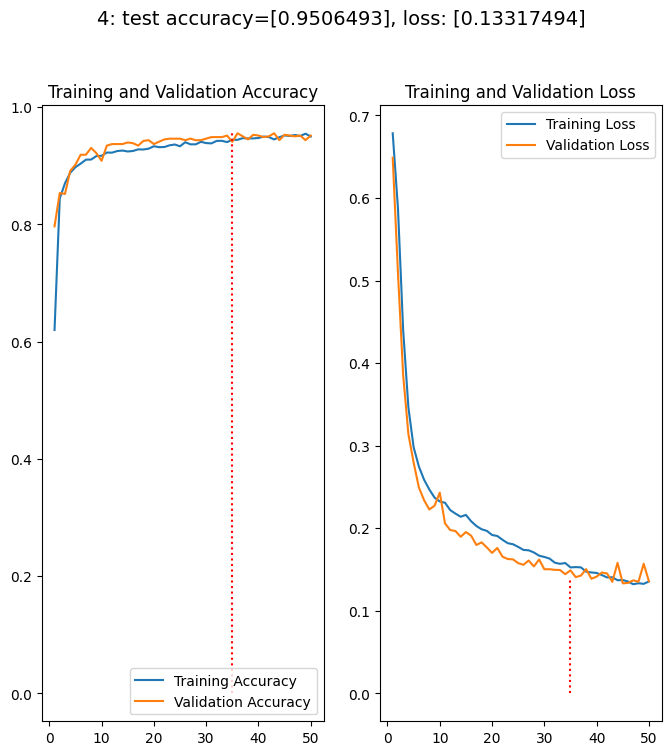

In [23]:
trainer.plot_performance('task4_model_simple.png', group_no=4)

***
#### Q2: What values are optimized during the training process of a CNN? Why isn't the validation accuracy increasing after some time? Why do we use a validation dataset?

All the trainable parameters of the network, including kernel weights for the convolution layer, the node connection weights for the linear layer and the bias terms for all of these are optimized during the training process so that the loss of the model on the training dataset would be as low as possible. The reason why validation accuracy does not increase any more after some time could be due to several reasons. One of them is that the model starts overfitting for the training dataset and the validation accuracy actually starts decreasing. However, it is inconclusive whether this is the case in our model as the validation error seems to keep going down or stays roughly the same. Another reason could be that the complexity of the model or the quality or variability of the training data is simply not enough to properly fully capture all features to make accurate predictions. The reason for using a validation dataset is to detect when the model starts overfitting to the training data.

### 3 Regularization
#### 3.1 Network Structure

With the basic model you should have achieved a test accuracy of about 95% As you can see on the last model performance, the simple model starts to overfit on the training data. One option to improve generalization is to use regularization. You can add batch normalization and dropout to do so. Update the **MaskClassifier** to include those techniques. Add dropout and batch normalization before suitable layers. Use the dropout parameter passed to the constructor for the dropout rate.

Create a new model with a dropout rate of **dropout=0.5** or **batch_norm=True** and name it **'model_regularized'**. Take a look at the structure of your model by calling ***summary(model2)***. 


In [24]:
model_regularized = my_model.MaskClassifier('Regularized classifier', img_size = 64, dropout = 0.5, batch_norm = True)
summary(model_regularized, (32, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
MaskClassifier                           [32, 1]                   --
├─Sequential: 1-1                        [32, 1]                   --
│    └─Conv2d: 2-1                       [32, 32, 62, 62]          896
│    └─BatchNorm2d: 2-2                  [32, 32, 62, 62]          64
│    └─MaxPool2d: 2-3                    [32, 32, 31, 31]          --
│    └─ReLU: 2-4                         [32, 32, 31, 31]          --
│    └─Conv2d: 2-5                       [32, 32, 29, 29]          9,248
│    └─BatchNorm2d: 2-6                  [32, 32, 29, 29]          64
│    └─MaxPool2d: 2-7                    [32, 32, 14, 14]          --
│    └─ReLU: 2-8                         [32, 32, 14, 14]          --
│    └─Flatten: 2-9                      [32, 6272]                --
│    └─Dropout: 2-10                     [32, 6272]                --
│    └─Linear: 2-11                      [32, 1]                   6,273
│    └─S

***
#### Q3: Compare the network structure of the model with and without regularization. What will be the effect of the dropout rate you have chosen? What is the effect of batch normalization?

I added a dropout layer before the linear layer to remove the effect of a random number of nodes. This has the effect of making the network less reliable on certain nodes on the linear layer and removing codependency between nodes. This can have the effect of producing more robust predictions.
Batch normalization normalizes the outputs of the previous layer for every channel so that the mean is zero and the standard deviation is one across the batch. This prevents vanishing or exploding gradients. Batch normalization also introduces a degree of randomness to each batch, as the statistics can vary between batches even though the underlying distribution is the same. This is the regularizing element of batch normalization.

#### 3.2 Training the network

Create a new Trainer object called **trainer2**.
Train the second network, using the same learning rate you used for the first model and set the number of epochs around **50**. 
You can use the same Data Module as for the simple model.


In [25]:
trainer2 = my_trainer.Trainer(model_regularized, dataModule, gpu=torch.cuda.is_available())
trainer2.fit(epochs=50)

Epoch 0: 100%|██████████| 42/42 [00:17<00:00,  2.38it/s]


Epoch 0 Training: Loss: 0.48191460967063904 Accuracy: 0.7762420177459717
Epoch 0 Validation: Loss: 0.36584171652793884 Accuracy: 0.8993923664093018


Epoch 1: 100%|██████████| 42/42 [00:18<00:00,  2.30it/s]


Epoch 1 Training: Loss: 0.27564844489097595 Accuracy: 0.9008986353874207
Epoch 1 Validation: Loss: 0.22918611764907837 Accuracy: 0.9254340529441833


Epoch 2: 100%|██████████| 42/42 [00:18<00:00,  2.22it/s]


Epoch 2 Training: Loss: 0.22956566512584686 Accuracy: 0.9173535108566284
Epoch 2 Validation: Loss: 0.2032197266817093 Accuracy: 0.9281249642372131


Epoch 3: 100%|██████████| 42/42 [00:18<00:00,  2.25it/s]


Epoch 3 Training: Loss: 0.21112360060214996 Accuracy: 0.9256238341331482
Epoch 3 Validation: Loss: 0.19847215712070465 Accuracy: 0.9372395873069763


Epoch 4: 100%|██████████| 42/42 [00:18<00:00,  2.27it/s]


Epoch 4 Training: Loss: 0.19431954622268677 Accuracy: 0.9278559684753418
Epoch 4 Validation: Loss: 0.181978240609169 Accuracy: 0.9411458373069763


Epoch 5: 100%|██████████| 42/42 [00:18<00:00,  2.23it/s]


Epoch 5 Training: Loss: 0.17946355044841766 Accuracy: 0.9343807697296143
Epoch 5 Validation: Loss: 0.17111438512802124 Accuracy: 0.9450520873069763


Epoch 6: 100%|██████████| 42/42 [00:17<00:00,  2.38it/s]


Epoch 6 Training: Loss: 0.16441601514816284 Accuracy: 0.938215434551239
Epoch 6 Validation: Loss: 0.16448844969272614 Accuracy: 0.9475694298744202


Epoch 7: 100%|██████████| 42/42 [00:18<00:00,  2.26it/s]


Epoch 7 Training: Loss: 0.1623079776763916 Accuracy: 0.943366527557373
Epoch 7 Validation: Loss: 0.1816512793302536 Accuracy: 0.9387152791023254


Epoch 8: 100%|██████████| 42/42 [00:19<00:00,  2.18it/s]


Epoch 8 Training: Loss: 0.15444791316986084 Accuracy: 0.9470868110656738
Epoch 8 Validation: Loss: 0.15392537415027618 Accuracy: 0.9527778029441833


Epoch 9: 100%|██████████| 42/42 [00:18<00:00,  2.30it/s]


Epoch 9 Training: Loss: 0.1413358896970749 Accuracy: 0.9534398317337036
Epoch 9 Validation: Loss: 0.15807637572288513 Accuracy: 0.949131965637207


Epoch 10: 100%|██████████| 42/42 [00:17<00:00,  2.36it/s]


Epoch 10 Training: Loss: 0.13739581406116486 Accuracy: 0.9508070349693298
Epoch 10 Validation: Loss: 0.1504383236169815 Accuracy: 0.9450520873069763


Epoch 11: 100%|██████████| 42/42 [00:18<00:00,  2.26it/s]


Epoch 11 Training: Loss: 0.1271490752696991 Accuracy: 0.9557577967643738
Epoch 11 Validation: Loss: 0.14345751702785492 Accuracy: 0.9515624642372131


Epoch 12: 100%|██████████| 42/42 [00:18<00:00,  2.27it/s]


Epoch 12 Training: Loss: 0.1241753101348877 Accuracy: 0.9589056968688965
Epoch 12 Validation: Loss: 0.14022575318813324 Accuracy: 0.9515624642372131


Epoch 13: 100%|██████████| 42/42 [00:18<00:00,  2.31it/s]


Epoch 13 Training: Loss: 0.11538425832986832 Accuracy: 0.9607658386230469
Epoch 13 Validation: Loss: 0.13940759003162384 Accuracy: 0.9555554986000061


Epoch 14: 100%|██████████| 42/42 [00:18<00:00,  2.24it/s]


Epoch 14 Training: Loss: 0.11310287564992905 Accuracy: 0.9587339758872986
Epoch 14 Validation: Loss: 0.14151595532894135 Accuracy: 0.9516492486000061


Epoch 15: 100%|██████████| 42/42 [00:16<00:00,  2.48it/s]


Epoch 15 Training: Loss: 0.107332743704319 Accuracy: 0.9632840752601624
Epoch 15 Validation: Loss: 0.13633115589618683 Accuracy: 0.9555554986000061


Epoch 16: 100%|██████████| 42/42 [00:17<00:00,  2.47it/s]


Epoch 16 Training: Loss: 0.10445176064968109 Accuracy: 0.9651442170143127
Epoch 16 Validation: Loss: 0.13174426555633545 Accuracy: 0.9541666507720947


Epoch 17: 100%|██████████| 42/42 [00:17<00:00,  2.47it/s]


Epoch 17 Training: Loss: 0.10443908721208572 Accuracy: 0.9651442170143127
Epoch 17 Validation: Loss: 0.13425619900226593 Accuracy: 0.9594617486000061


Epoch 18: 100%|██████████| 42/42 [00:16<00:00,  2.49it/s]


Epoch 18 Training: Loss: 0.09678322076797485 Accuracy: 0.9706387519836426
Epoch 18 Validation: Loss: 0.12588755786418915 Accuracy: 0.9568576216697693


Epoch 19: 100%|██████████| 42/42 [00:17<00:00,  2.44it/s]


Epoch 19 Training: Loss: 0.09166879206895828 Accuracy: 0.9694082140922546
Epoch 19 Validation: Loss: 0.12055975943803787 Accuracy: 0.9528645873069763


Epoch 20: 100%|██████████| 42/42 [00:16<00:00,  2.50it/s]


Epoch 20 Training: Loss: 0.09394396841526031 Accuracy: 0.9699805378913879
Epoch 20 Validation: Loss: 0.132676362991333 Accuracy: 0.9542534351348877


Epoch 21: 100%|██████████| 42/42 [00:16<00:00,  2.49it/s]


Epoch 21 Training: Loss: 0.08779160678386688 Accuracy: 0.970896303653717
Epoch 21 Validation: Loss: 0.1222924292087555 Accuracy: 0.9607638716697693


Epoch 22: 100%|██████████| 42/42 [00:17<00:00,  2.46it/s]


Epoch 22 Training: Loss: 0.08412253111600876 Accuracy: 0.970896303653717
Epoch 22 Validation: Loss: 0.12307880073785782 Accuracy: 0.9568576216697693


Epoch 23: 100%|██████████| 42/42 [00:17<00:00,  2.40it/s]


Epoch 23 Training: Loss: 0.08032909780740738 Accuracy: 0.9724988341331482
Epoch 23 Validation: Loss: 0.11590462177991867 Accuracy: 0.9567708373069763


Epoch 24: 100%|██████████| 42/42 [00:16<00:00,  2.47it/s]


Epoch 24 Training: Loss: 0.07572566717863083 Accuracy: 0.9773065447807312
Epoch 24 Validation: Loss: 0.11981070786714554 Accuracy: 0.9594617486000061


Epoch 25: 100%|██████████| 42/42 [00:17<00:00,  2.44it/s]


Epoch 25 Training: Loss: 0.07521254569292068 Accuracy: 0.976934552192688
Epoch 25 Validation: Loss: 0.1154760792851448 Accuracy: 0.9594617486000061


Epoch 26: 100%|██████████| 42/42 [00:17<00:00,  2.36it/s]


Epoch 26 Training: Loss: 0.07231750339269638 Accuracy: 0.9773065447807312
Epoch 26 Validation: Loss: 0.10873458534479141 Accuracy: 0.9633679986000061


Epoch 27: 100%|██████████| 42/42 [00:17<00:00,  2.40it/s]


Epoch 27 Training: Loss: 0.06842068582773209 Accuracy: 0.9772207140922546
Epoch 27 Validation: Loss: 0.11704204231500626 Accuracy: 0.9594617486000061


Epoch 28: 100%|██████████| 42/42 [00:18<00:00,  2.24it/s]


Epoch 28 Training: Loss: 0.066016785800457 Accuracy: 0.9784226417541504
Epoch 28 Validation: Loss: 0.11066126078367233 Accuracy: 0.9633679986000061


Epoch 29: 100%|██████████| 42/42 [00:18<00:00,  2.27it/s]


Epoch 29 Training: Loss: 0.06320611387491226 Accuracy: 0.9784226417541504
Epoch 29 Validation: Loss: 0.12229899317026138 Accuracy: 0.9582465291023254


Epoch 30: 100%|██████████| 42/42 [00:17<00:00,  2.38it/s]


Epoch 30 Training: Loss: 0.06463660299777985 Accuracy: 0.9798249006271362
Epoch 30 Validation: Loss: 0.10687237977981567 Accuracy: 0.9620659351348877


Epoch 31: 100%|██████████| 42/42 [00:18<00:00,  2.23it/s]


Epoch 31 Training: Loss: 0.06468957662582397 Accuracy: 0.9795386791229248
Epoch 31 Validation: Loss: 0.10624828189611435 Accuracy: 0.9620659351348877


Epoch 32: 100%|██████████| 42/42 [00:18<00:00,  2.32it/s]


Epoch 32 Training: Loss: 0.05813177302479744 Accuracy: 0.9819712042808533
Epoch 32 Validation: Loss: 0.10920661687850952 Accuracy: 0.9620659351348877


Epoch 33: 100%|██████████| 42/42 [00:18<00:00,  2.29it/s]


Epoch 33 Training: Loss: 0.05862097069621086 Accuracy: 0.981513261795044
Epoch 33 Validation: Loss: 0.11381598562002182 Accuracy: 0.9568576216697693


Epoch 34: 100%|██████████| 42/42 [00:18<00:00,  2.32it/s]


Epoch 34 Training: Loss: 0.054093122482299805 Accuracy: 0.9834592938423157
Epoch 34 Validation: Loss: 0.10945242643356323 Accuracy: 0.9579861164093018


Epoch 35: 100%|██████████| 42/42 [00:17<00:00,  2.39it/s]


Epoch 35 Training: Loss: 0.05640507489442825 Accuracy: 0.9831730723381042
Epoch 35 Validation: Loss: 0.10227812081575394 Accuracy: 0.9580729007720947


Epoch 36: 100%|██████████| 42/42 [00:17<00:00,  2.33it/s]


Epoch 36 Training: Loss: 0.055144984275102615 Accuracy: 0.9839171171188354
Epoch 36 Validation: Loss: 0.10732977837324142 Accuracy: 0.9646701216697693


Epoch 37: 100%|██████████| 42/42 [00:17<00:00,  2.43it/s]


Epoch 37 Training: Loss: 0.0541774146258831 Accuracy: 0.9816849827766418
Epoch 37 Validation: Loss: 0.09864779561758041 Accuracy: 0.9620659351348877


Epoch 38: 100%|██████████| 42/42 [00:18<00:00,  2.29it/s]


Epoch 38 Training: Loss: 0.04442053660750389 Accuracy: 0.988467276096344
Epoch 38 Validation: Loss: 0.10844717174768448 Accuracy: 0.9620659351348877


Epoch 39: 100%|██████████| 42/42 [00:18<00:00,  2.33it/s]


Epoch 39 Training: Loss: 0.04767736792564392 Accuracy: 0.9866071343421936
Epoch 39 Validation: Loss: 0.10260143876075745 Accuracy: 0.9607638716697693


Epoch 40: 100%|██████████| 42/42 [00:17<00:00,  2.40it/s]


Epoch 40 Training: Loss: 0.05010266602039337 Accuracy: 0.984375
Epoch 40 Validation: Loss: 0.10644689947366714 Accuracy: 0.9646701216697693


Epoch 41: 100%|██████████| 42/42 [00:17<00:00,  2.43it/s]


Epoch 41 Training: Loss: 0.041578467935323715 Accuracy: 0.9879235625267029
Epoch 41 Validation: Loss: 0.09914648532867432 Accuracy: 0.9633679986000061


Epoch 42: 100%|██████████| 42/42 [00:17<00:00,  2.43it/s]


Epoch 42 Training: Loss: 0.04224617779254913 Accuracy: 0.9892113208770752
Epoch 42 Validation: Loss: 0.09901300817728043 Accuracy: 0.9607638716697693


Epoch 43: 100%|██████████| 42/42 [00:17<00:00,  2.44it/s]


Epoch 43 Training: Loss: 0.0440070703625679 Accuracy: 0.988467276096344
Epoch 43 Validation: Loss: 0.10325529426336288 Accuracy: 0.9594617486000061


Epoch 44: 100%|██████████| 42/42 [00:16<00:00,  2.47it/s]


Epoch 44 Training: Loss: 0.037671905010938644 Accuracy: 0.9909855723381042
Epoch 44 Validation: Loss: 0.0972679853439331 Accuracy: 0.9659721851348877


Epoch 45: 100%|██████████| 42/42 [00:18<00:00,  2.32it/s]


Epoch 45 Training: Loss: 0.039869196712970734 Accuracy: 0.9897837042808533
Epoch 45 Validation: Loss: 0.10260360687971115 Accuracy: 0.9580729007720947


Epoch 46: 100%|██████████| 42/42 [00:19<00:00,  2.20it/s]


Epoch 46 Training: Loss: 0.03988742083311081 Accuracy: 0.9876374006271362
Epoch 46 Validation: Loss: 0.10644983500242233 Accuracy: 0.9633679986000061


Epoch 47: 100%|██████████| 42/42 [00:18<00:00,  2.28it/s]


Epoch 47 Training: Loss: 0.03692548722028732 Accuracy: 0.990241527557373
Epoch 47 Validation: Loss: 0.10157551616430283 Accuracy: 0.9633679986000061


Epoch 48: 100%|██████████| 42/42 [00:19<00:00,  2.20it/s]


Epoch 48 Training: Loss: 0.03783136233687401 Accuracy: 0.988095223903656
Epoch 48 Validation: Loss: 0.09715943783521652 Accuracy: 0.9659721851348877


Epoch 49: 100%|██████████| 42/42 [00:18<00:00,  2.30it/s]


Epoch 49 Training: Loss: 0.03498550131917 Accuracy: 0.9917296171188354
Epoch 49 Validation: Loss: 0.09807503968477249 Accuracy: 0.9672742486000061


#### 3.3 Plot Performance

Plot the performance of the second model with ***trainer2.plot_performance(..)***.

***Submission:*** Save the output of ***trainer2.plot_performance(..)*** as **task4_model_regularized.png**

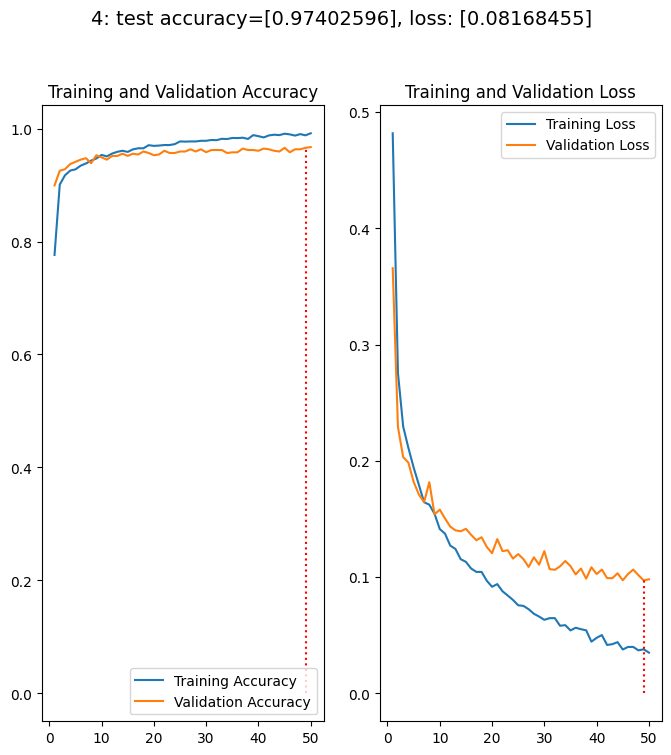

In [26]:
trainer2.plot_performance('task4_model_regularized.png', group_no=4)

***
#### Q4: Compare the performance of the model with and without regularization. Where do you see improvements?


In both accuracy and loss, the regularized model performs better. After some point, validation accuracy increased slower than training accuracy. Despite that, this model performs better on the validation set than the simple model.

### 4 Data Augmentation
#### 4.1 Advanced Data Pre-Processing
You will enhance generalization of the network by artificially adding more variety to the training data. Implement data augmentation in **get_transforms** method of **my_datamodule**. Have a look at [torchvision transforms](https://pytorch.org/vision/stable/transforms.html) and choose at least three data augmentation techniques.

In [5]:
dm2 = my_datamodule.DataModule(augmented = True, num_workers = 4)

#### 4.2 Activation Maps before Training
Create a model with a dropout rate of **60%** and batch normalization. Use a learning rate of approximately **0.0007**. Call the model **'model_augmented'**.

The convolutional layers in the network are initialised with random values. We are going to compare the activation maps before and after the training process. Use ***utils.plot_activation_maps(..)*** to plot some untrained activation maps and filter kernels of the third model. 

Get two image sample of the augmented training dataset with **sample=dm2.train_dataset[...][0]**, one with a mask and one without a mask. Pass each image sample to ***utils.plot_activation_maps(..)***.


***Submission:*** Save the activation maps of the untrained model as **task4_face_activation_maps_before.png** and **task4_mask_activation_maps_before.png** using ***utils.plot_activation_maps(..)***



In [14]:
model_augmented = my_model.MaskClassifier('AugmentedModel', batch_norm = True, dropout = 0.6)
checkpoint = torch.load('results/best/AugmentedModel.pth')

<All keys matched successfully>

Total convolutional layers: 2
Total convolutional layers: 2


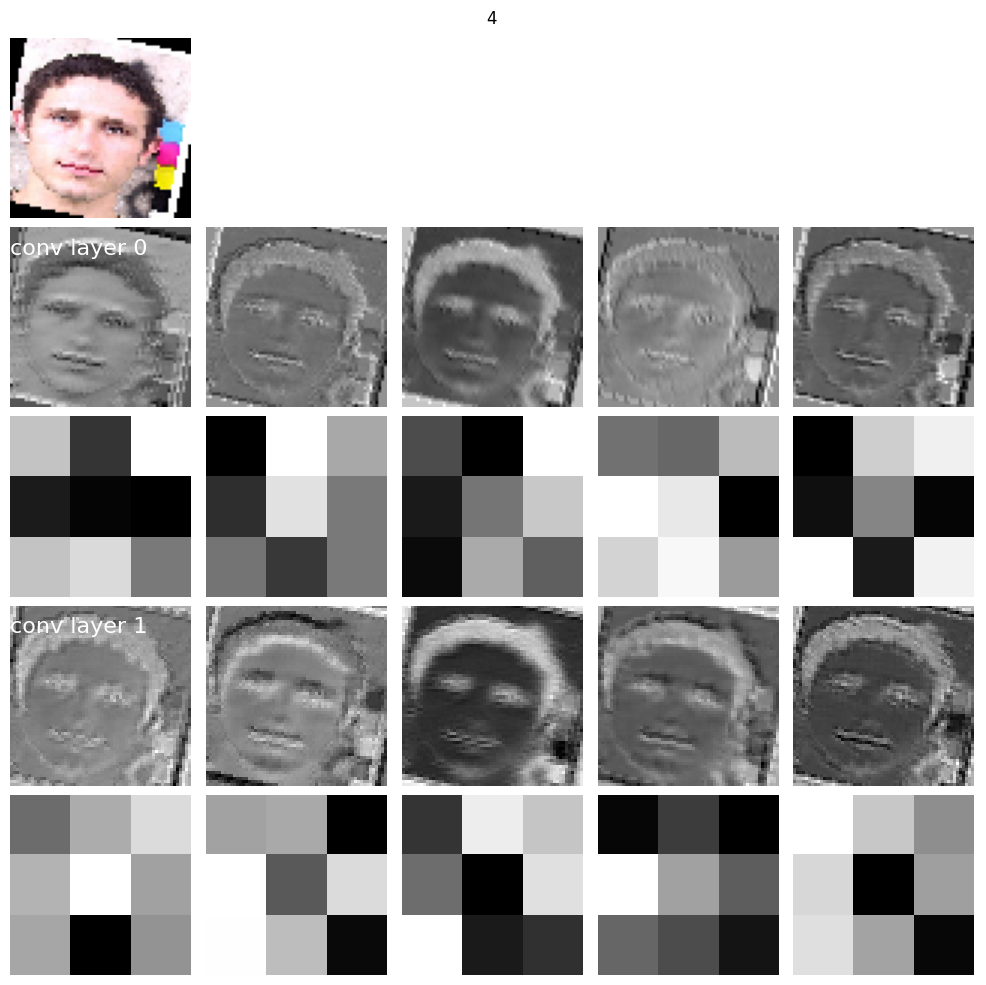

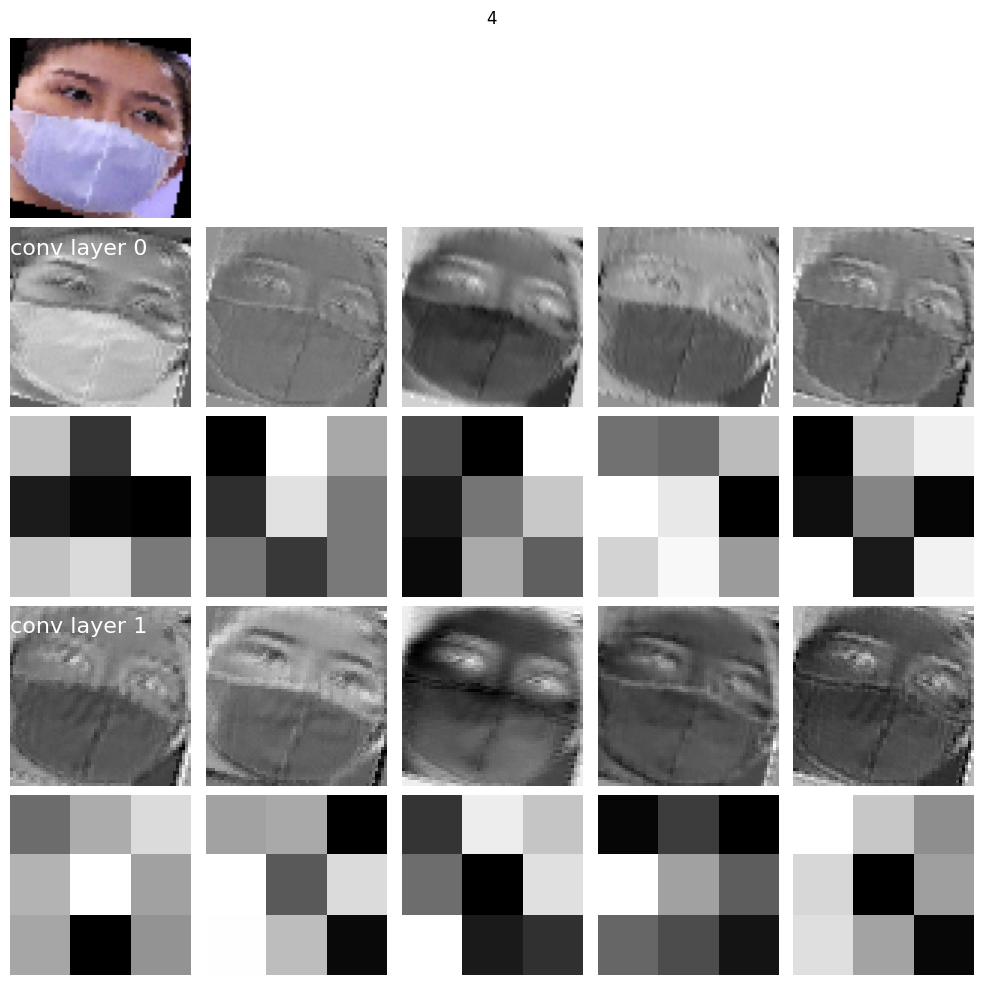

In [11]:
(face_sample, _) = dm2.train_dataset[0]
(mask_sample, _) = dm2.train_dataset[len(dm2.train_dataset) - 1]
utils.plot_activation_maps(model_augmented, face_sample, group_no = 4, name = 'task4_face_activation_maps_before.png')
utils.plot_activation_maps(model_augmented, mask_sample, group_no = 4, name = 'task4_mask_activation_maps_before.png')

#### 4.3 Training the network
Create a third trainer object and train the third network here using the augmented datamodule. Set the epochs to around **100**.

Depending on your hardware this might take longer than the last training sessions.

In [15]:
trainer3 = my_trainer.Trainer(model_augmented, dm2, gpu = torch.cuda.is_available())
trainer3.fit(epochs = 100, lr = 0.0007)

#### 4.4. Performance Evaluation 
Plot the model performance of the third model with ***trainer3.plot_performance(..)***.

***Submission:*** Save the output of ***model.plot_curve(..)*** as **task4_model_augmented.png**

In [16]:
trainer3.plot_performance('task4_model_augmented', group_no = 4)

KeyError: 'train_accuracy'

***
#### Q5: Look at the performance of the third model over time, what do you observe compared to the first two models? Explain underfitting/overfitting based on your plots.

There is a lot more fluctuation in the performance of this model. The training and validation loss are higher than for the unaugmented regularized model. The difference is especially apparent in the training accuracy, where the regularized model achieves an almost perfect training accuracy. However, the augmented model achieves a slightly higher validation accuracy which indicates that it avoids overfitting even better than the regularized model.

#### 4.5 Activation Maps after Training
During training the weights of the model are adapted to the feature distribution of the training dataset. Plot some activation maps of the third model again using ***utils.plot_activation_maps(..)***. Use the same image samples you used before.

***Submission:*** Save the activation maps after the training as **task4_mask_activation_maps_after.png** and **task4_face_activation_maps_after.png** using ***utils.plot_activation_maps(..)***

Total convolutional layers: 2
Total convolutional layers: 2


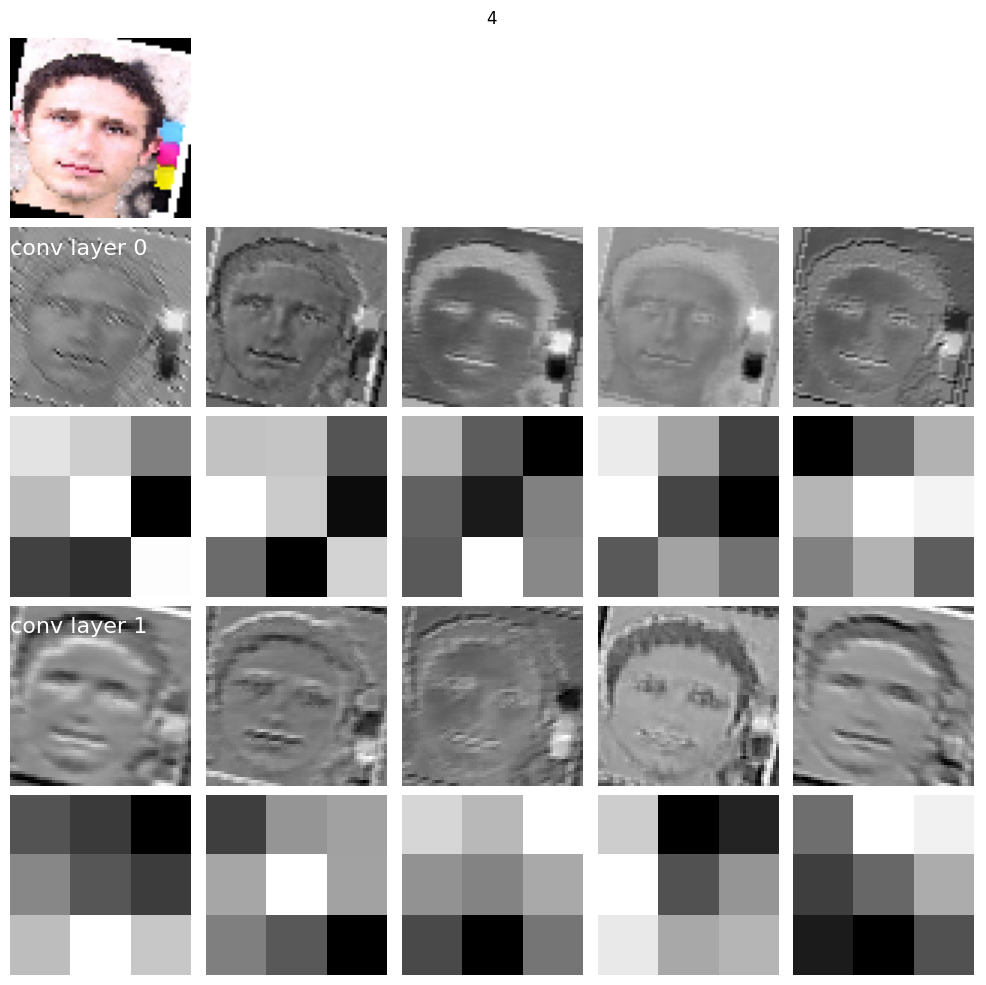

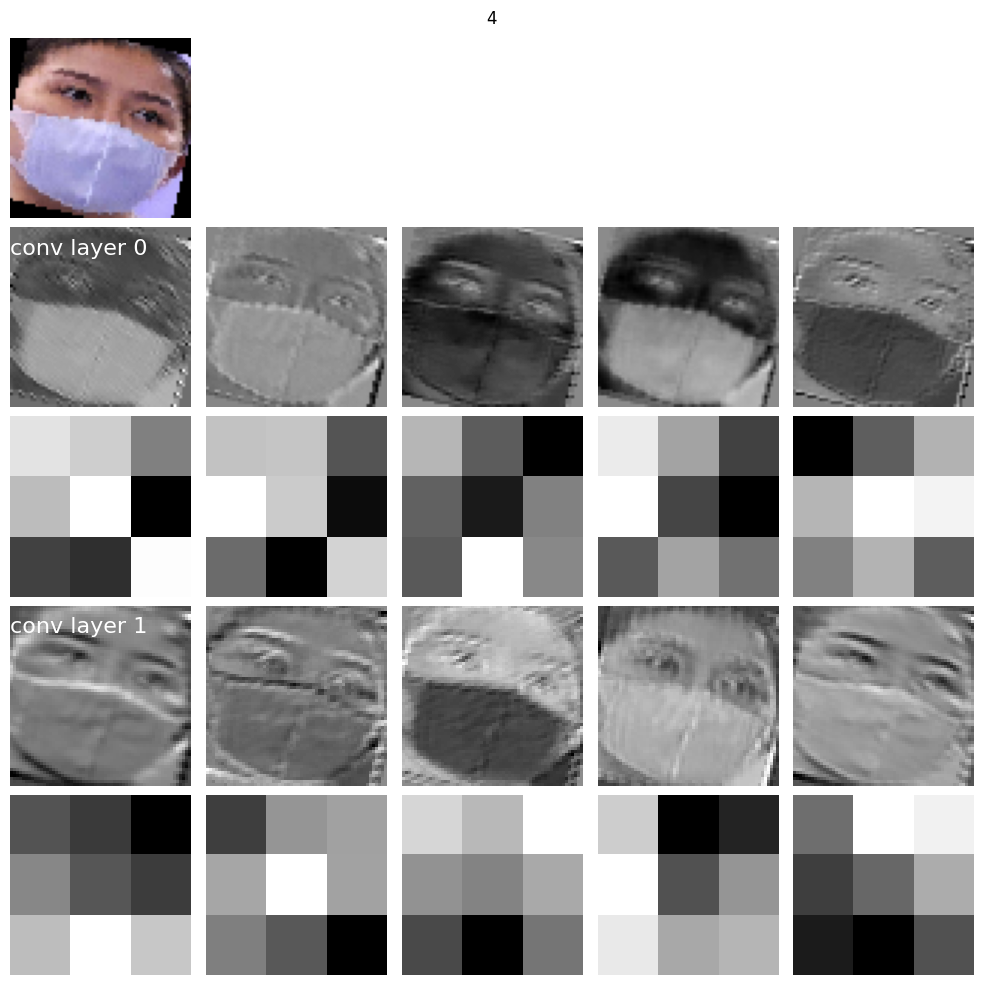

In [17]:
utils.plot_activation_maps(model_augmented, face_sample, group_no = 4, name = 'task4_face_activation_maps_after.png')
utils.plot_activation_maps(model_augmented, mask_sample, group_no = 4, name = 'task4_mask_activation_maps_after.png')

***
#### Q6: The activations and filter kernels after the training have changed, what do you observe? Explain possible reasons.


From the activation photos, I make one major observation. In the masked photos, there seems to be either a very strong line at the border of the mask and the rest of the face below the eye or a very stark contrast between the skin color and the mask color for most of the kernels .

### 5 Evaluation

Calculate the confusion matrix. You can use the function **confusion_matrix** from **sklearn.metrics**. A confusion matrix within a binary decision problem shows:
 - "true positive" for correctly predicted event values.
 - "false positive" for incorrectly predicted event values.
 - "true negative" for correctly predicted no-event values.
 - "false negative" for incorrectly predicted no-event values.

You can obtain the test data and labes by using **X, y = next(iter(dm2.text_dataloader()))**. Use **trainer3.predict(X)** to obtain the predicted value. You can convert a tensor to a numpy array by using **y.detach().numpy()**. 

In [29]:
from sklearn import metrics

X, y = next(iter(dm2.test_dataloader()))
y.detach().numpy()
y_pred = trainer3.predict(X)
cm = metrics.confusion_matrix(y, y_pred)
print(cm)

4
[[187   6]
 [  3 189]]


Just for curiosity, here are the predictions of images of me with and without a mask.

In [36]:
import PIL
own_face = PIL.Image.open('own_data/own_face.jpg')
own_mask = PIL.Image.open('own_data/own_mask.jpg')
transforms = dm2.get_transforms()
print(trainer3.predict(torch.stack((transforms(own_face), transforms(own_mask)))))

[[0.]
 [1.]]


#### Q7: Compare the approach for classification from TASK3 and TASK4. Discuss advantages, disadvantages, strength and weakness


In Task 3, the Bag of Words approach is employed for image classification. Initially, features are collected from the dataset to build a vocabulary, and then the model is trained based on word frequencies of the different classes. When classifying an image, features are deterministically extracted, and the image is assigned to a class according to the k-nearest neighbors to its word histogram.
\
In contrast, Task 4 utilizes Convolutional Neural Networks (CNN) for image classification. First, we need to build a proper model and then carefully train it over the dataset. To classify an image, we simply pass it through the model, and it outputs the final class.
\
The first method is simpler and more explainable; indeed, we know which features are involved in the classification and how they are used. On the other hand, its performance is poor compared to the results obtained with the CNN. The second method guarantees more reliable outputs and is much more flexible and adaptable to different scenarios. Nevertheless, we can't really understand how the features are extracted and processed by this model, making it a bit obscure. Finally, the second model requires much more computational power to be trained than the first one.